In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
DATAPATH = Path("C://Data//hislight_pickles//restricted_dark.pickle")

with open(DATAPATH, 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [21]:
mouse_to_be_analyzed = "HL209"

In [34]:
run_length = []
run_licks  = []

snips_start = []
snips_end = []
snips_full = []
    
kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

pre = 5
post = 10
mineventlength=10
binlength=0.1
    
for key, val in restricted_dark.items():
    if val["mouse_ID"] == mouse_to_be_analyzed:
        lickdata= tp.lickCalc(val["licks"], minrunlength=3)
        
        run_length.append(lickdata["rTime"])
        run_licks.append(lickdata["rLicks"])
       
        snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        
        snipper = tp.Snipper(val["corrected"],
                             lickdata["rStart"],
                             end=lickdata["rEnd"],
                             fs=val["fs"],
                             pre=pre,
                             post=post,
                             binlength=binlength,
                             zscore=True
                             )
        
        # plt.plot(snipper.snips)
        snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
        snips_full.append(snipper.snips)
        print(len(snipper.snips))
        print(len(snipper.snips[0]))
        print(len(snipper.snips[1]))
        

run_length = tp.flatten_list(run_length)
run_licks = tp.flatten_list(run_licks)

snips_start = np.vstack(snips_start)
snips_end = np.vstack(snips_end)
snips_full = np.vstack(snips_full)

11
260
260
9
260
260
16
260
260


In [29]:
snips_full.shape

(36, 250)

<ipython-input-30-8040b21149a9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["-5", "0", "5", "10", "15"])


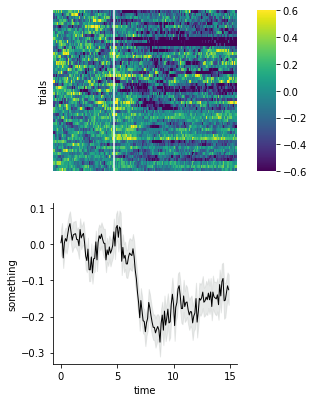

In [30]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1]})



sns.heatmap(snips_start, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=0.6, vmin=-0.6)
tp.shadedError(ax3, snips_start)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticklabels(["-5", "0", "5", "10", "15"])

#ax3.set_xticks([0, 50, 100, 150], labels=["-5", "0", "5", "10"])

ax3.set_xlabel("time")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

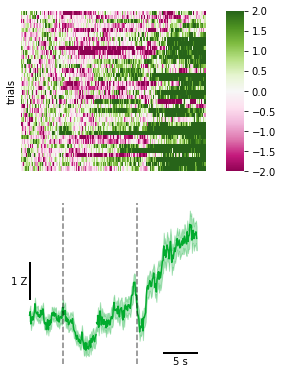

In [31]:


f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1]})



sns.heatmap(snips_full, ax=ax1, cbar_ax= ax2, cmap="PiYG", vmax=2, vmin=-2)

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(snips_full.shape[1] - bins_late, snips_full.shape[1])

mean = np.mean(snips_full, axis=0)
error_values = np.std(snips_full, axis=0) / np.sqrt(len(snips_full))

color="xkcd:kelly green"

ax3.plot(x1, mean[:bins_early], color=color)
ax3.plot(x2, mean[-bins_late:], color=color)
ax3.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax3.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)


# tp.shadedError(ax3, snips_full)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_yticks([])
ax3.set_xticks([])

# ax3.set_xticklabels(["-5", "0", "5", "10", "15"])

# ax3.set_xticks([0, 50, 100, 150], labels=["-5", "0", "5", "10"])

# ax3.set_xlabel("Time from first lick (s)")
# ax3.set_ylabel("Z-Score")
ax1.set_ylabel("trials")

# ax1.set_yticks([1,10,20,30])

for spine in ["top", "right", "left", "bottom"]:
    ax3.spines[spine].set_visible(False)

ax3.plot([200,250], [-1,-1], linewidth=2, color="k")
ax3.text(225,-1.1,"5 s", va="top", ha="center")

ax3.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax3.text(-3, 1, "1 Z", va="center", ha="right")

ax3.axvline(50, color="k", linestyle="--", alpha=0.5)
ax3.axvline(160, color="k", linestyle="--", alpha=0.5)

In [32]:
snips = np.array([(2,2,2,2,), (4,4,4,4,4,4,4,), (8,8,8,8,8,8,8,8,8,8,8,8,)], dtype=object)

start = np.array([5, 25, 45])
end = np.array([10, 26, 55])

np.where(end-start > 4)

(array([0, 2], dtype=int64),)

In [27]:
snips[np.where(end-start > 4)]

array([(2, 2, 2, 2), (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)], dtype=object)

In [5]:
snips.shape

(3,)

In [36]:
snips_full.shape

(36, 260)